In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker

import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

import os

C:\Program Files\Anaconda3\envs\carmi_thesis_3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import importlib
import plot, loaders
plot = importlib.reload(plot)
loaders = importlib.reload(loaders)

In [3]:
PLOT_THICKENS = True
if PLOT_THICKENS:
    # sns.plotting_context("talk")
    CUSTOM_SNS_RC = {'xtick.labelsize': 13.5, 'ytick.labelsize': 13.5, 'legend.fontsize': 13.0, 
                                                 'axes.labelsize': 14, 'axes.titlesize': 15}
    # sns.set_context("paper", font_scale=1.4, rc=CUSTOM_SNS_RC)
    sns.set_context("talk", font_scale=1, rc=CUSTOM_SNS_RC)

In [4]:
PGS_DIR = os.path.join("data", "pgs")
SAVE_FIG_DIR = "figure1"

# Gain As function of $R^2$
Theoretical model:
$$
E[\hat{y}] = \sigma_y h_p \Phi_{max}(n) \sqrt{1 - \rho}
$$

#### Covariate model

In [5]:
longevity_data = loaders.load_longevity_data(pgs_col=None, convert_to_cm=True)
longevity_data.head()

const  Gender  Age  Height
FID IID                            
2   427    1.0       0   61  157.48
    448    1.0       1   62  177.80
11  615    1.0       0   64  157.48
    616    1.0       1   65  172.72
24  887    1.0       1   65  187.96

In [6]:
height_model_covar = sm.OLS(endog=longevity_data["Height"], exog=longevity_data[["const", "Gender", "Age"]]).fit()
print(height_model_covar.rsquared)

0.6083835435619124


#### Model for each (cumulative) chromosome

In [7]:
longevity_cum_pgs = loaders.load_pgs_by_chromosome(os.path.join(PGS_DIR, "longevity_height_by-chr-cum"))
longevity_cum_pgs.head()

chr            1         2         3         4         5         6         7   \
FID IID                                                                         
2   427  0.000095  0.000110 -0.000004 -0.000043 -0.000019 -0.000042 -0.000041   
    448 -0.000276 -0.000113 -0.000163 -0.000192 -0.000140 -0.000118 -0.000108   
11  615  0.000161  0.000106  0.000006 -0.000062 -0.000076 -0.000014 -0.000009   
    616  0.000126  0.000039 -0.000089 -0.000117 -0.000083 -0.000054 -0.000046   
26  879  0.000124  0.000048 -0.000023 -0.000041 -0.000006  0.000019  0.000022   

chr            8         9         10    ...           13        14        15  \
FID IID                                  ...                                    
2   427 -0.000035 -0.000071 -0.000037    ...    -0.000023 -0.000030  0.000007   
    448 -0.000067 -0.000085 -0.000052    ...    -0.000024 -0.000026  0.000008   
11  615  0.000042  0.000018  0.000032    ...     0.000042  0.000021  0.000039   
    616  0.000018  0.000021  0.000045    ...     0.000074  0.000071  0.000080   
26  879  0.000064  0.000045  0.000082    ...     0.000100  0.000095  0.000114   

chr            16            17        18        19        20        21  \
FID IID                                                                   
2   427 -0.000003 -5.133230e-06  0.000005  0.000015  0.000020  0.000023   
    448 -0.000002 -6.903420e-07  0.000016  0.000020  0.000019  0.000017   
11  615  0.000026  3.470700e-05  0.000052  0.000052  0.000039  0.000037   
    616  0.000062  6.692270e-05  0.000081  0.000082  0.000081  0.000084   
26  879  0.000094  1.087590e-04  0.000123  0.000132  0.000121  0.000119   

chr            22  
FID IID            
2   427  0.000028  
    448  0.000028  
11  615  0.000042  
    616  0.000086  
26  879  0.000123  

[5 rows x 22 columns]

In [8]:
aspis_cum_pgs = loaders.load_pgs_by_chromosome(os.path.join(PGS_DIR, "aspis_gcf_by-chr-cum"))
aspis_iq = loaders.load_aspis_data()["IQ"]
aspis_cum_pgs.head()

chr              1         2         3         4         5         6   \
FID  IID                                                                
2105 2105 -0.000050 -0.000050 -0.000035 -0.000039 -0.000046 -0.000044   
5375 5375 -0.000043 -0.000047 -0.000032 -0.000030 -0.000023 -0.000026   
3217 3217 -0.000027 -0.000041 -0.000039 -0.000036 -0.000033 -0.000025   
5088 5088 -0.000019 -0.000026 -0.000031 -0.000036 -0.000036 -0.000032   
2266 2266 -0.000082 -0.000061 -0.000053 -0.000045 -0.000047 -0.000038   

chr              7         8         9         10    ...           13  \
FID  IID                                             ...                
2105 2105 -0.000028 -0.000026 -0.000029 -0.000026    ...    -0.000024   
5375 5375 -0.000018 -0.000018 -0.000019 -0.000013    ...    -0.000010   
3217 3217 -0.000016 -0.000025 -0.000023 -0.000019    ...    -0.000015   
5088 5088 -0.000020 -0.000020 -0.000018 -0.000013    ...    -0.000007   
2266 2266 -0.000027 -0.000030 -0.000026 -0.000027    ...    -0.000028   

chr              14        15            16        17            18  \
FID  IID                                                              
2105 2105 -0.000024 -0.000023 -1.586820e-05 -0.000016 -1.642010e-05   
5375 5375 -0.000008 -0.000010 -6.432850e-06 -0.000004 -4.340030e-06   
3217 3217 -0.000012 -0.000012 -6.779790e-06 -0.000007 -6.544310e-06   
5088 5088 -0.000004 -0.000003  5.451120e-07  0.000001 -7.880410e-07   
2266 2266 -0.000026 -0.000027 -2.097950e-05 -0.000019 -1.833270e-05   

chr                  19        20            21        22  
FID  IID                                                   
2105 2105 -1.499480e-05 -0.000016 -1.743430e-05 -0.000018  
5375 5375 -3.922680e-06 -0.000002 -5.035430e-06 -0.000006  
3217 3217 -5.183400e-06 -0.000005 -7.739980e-06 -0.000007  
5088 5088 -3.314840e-07  0.000001 -8.849670e-07  0.000002  
2266 2266 -1.569780e-05 -0.000016 -1.840190e-05 -0.000018  

[5 rows x 22 columns]

Fit a model for each chromosome

In [9]:
def fit_model_per_chromosome(pgs_per_chromosome, y):
    """
    pgs_per_chromosome: pd.DataFrame where each column i correspond to a pgs score 
                        calculated using only 1...i chromosomes
    """
    cum_models = {}
    for chr_num, col_data in pgs_per_chromosome.iteritems():
        cur_X = sm.add_constant(col_data)
        cur_X = cur_X.loc[y.index]    # Align indices

        cur_model = sm.OLS(endog=y, exog=cur_X).fit()
        cum_models[chr_num] = cur_model
    return cum_models

In [10]:
height_cum_models = fit_model_per_chromosome(longevity_cum_pgs, y=height_model_covar.resid)
aspis_cum_models = fit_model_per_chromosome(aspis_cum_pgs, y=aspis_iq)

Get $R^2$ score for each chromosome

In [11]:
height_cum_r2_scores = {chr_num: model.rsquared for chr_num, model in height_cum_models.items()}
aspis_cum_r2_scores = {chr_num: model.rsquared for chr_num, model in aspis_cum_models.items()}
cum_r2_scores = pd.DataFrame({"Height": height_cum_r2_scores, "IQ": aspis_cum_r2_scores})
cum_r2_scores.head()

Height        IQ
1  0.021157  0.005065
2  0.037884  0.005910
3  0.057265  0.007600
4  0.048352  0.010805
5  0.096530  0.017431

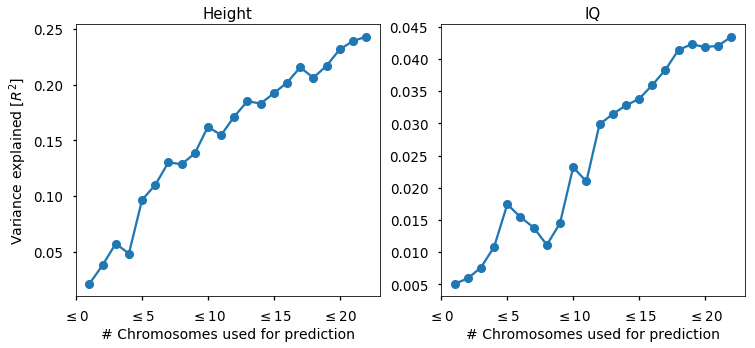

In [12]:
# axes = cum_r2_scores.plot(marker="o", title=r"$r^2$ Score as Function of Genetic Panel Size", 
#                         figsize=(12,5), subplots=True, layout=(1,2))
fig, axes = plt.subplots(1, 2, figsize=(12,5))
for (ax, col_name) in zip(axes, cum_r2_scores):
    cum_r2_scores[col_name].plot(marker="o", ax=ax)
    ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("$\\leq$%d"))
    ax.set_xlabel("# Chromosomes used for prediction")
    ax.set_title(col_name)
axes[0].set_ylabel(r"Variance explained $\left[R^2\right]$");

In [38]:
plot.save_fig(ax.get_figure(), "r2-by-chr" + ("_thick" if PLOT_THICKENS else ""), SAVE_FIG_DIR)

Get $R^2$ score as a function of accumulating base-pair positions

In [13]:
# chr_lengths_cum = chr_lengths.cumsum()
# cum_r2_score = pd.concat([cum_r2_score, chr_lengths_cum], axis="columns").set_index(3)[0]

try:
    longevity_chr_lengths = pd.read_csv(os.path.join("data", "longevity_chromosome-lengths.csv"),
                                        index_col="chr")["bp"]
    aspis_chr_lengths = pd.read_csv(os.path.join("data", "aspis_chromosome-lengths.csv"),
                                    index_col="chr")["bp"]
    chr_lengths = pd.concat({"Height": longevity_chr_lengths, "IQ": aspis_chr_lengths}, axis="columns")
except FileNotFoundError:
    try: 
        bp_positions = pd.read_csv(os.path.join("data", "longevity.bim"), delim_whitespace=True, header=None,
                                   usecols=[0, 3], names=["chr", "bp"])
        chr_lengths = bp_positions.groupby("chr").last()
        chr_lengths.to_csv(os.path.join("data", "longevity_chromosome-lengths.csv"))
    except FileNotFoundError:
        raise FileNotFoundError("Both the file of chromosome lengths was not found "
                                "AND a bim/map file to calculate those from was not found as well")
# chr_lengths = chr_lengths.set_index("chr")["bp"]
chr_lengths.head(3)

Height         IQ
chr                      
1    249218992  249170711
2    243048760  243048760
3    197838262  197833758

In [14]:
cum_chr_lengths = chr_lengths.cumsum()
cum_r2_scores = pd.concat({"r2": cum_r2_scores, "bp": cum_chr_lengths}, 
                          axis="columns").swaplevel(axis=1).sort_index(axis=1)
cum_r2_scores.head(3)

Height                   IQ          
            bp        r2         bp        r2
chr                                          
1    249218992  0.021157  249170711  0.005065
2    492267752  0.037884  492219471  0.005910
3    690106014  0.057265  690053229  0.007600

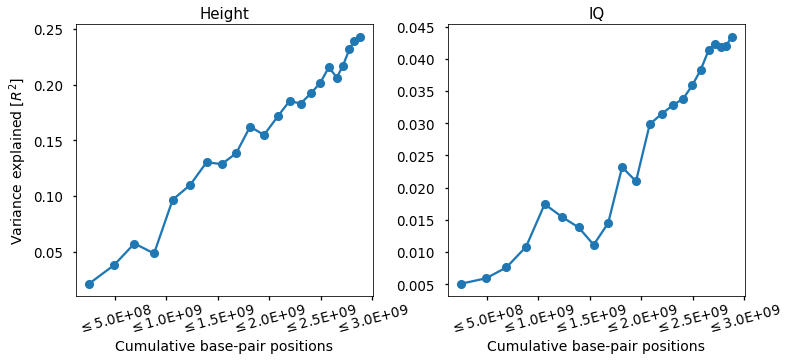

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
for (ax, col_name) in zip(axes, ["Height", "IQ"]):
    cum_r2_scores[col_name].plot(x="bp", y="r2", marker="o", legend=False, ax=ax)
    ax.xaxis.set_tick_params(rotation=15, pad=2)
    ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("$\\leq$%.1E"))
    ax.set_xlabel("Cumulative base-pair positions")
    ax.set_title(col_name)
fig.subplots_adjust(wspace=0.25)
axes[0].set_ylabel(r"Variance explained $\left[R^2\right]$");

In [80]:
plot.save_fig(ax.get_figure(), "r2-by-bp" + ("_thick" if PLOT_THICKENS else ""), SAVE_FIG_DIR)

### Prediction

In [16]:
longevity_so_random_10_height_cum_pgs = loaders.load_pgs_by_chromosome(os.path.join(PGS_DIR, 
                                                                                    "longevity_so_random_10_height_by-chr-cum"))
longevity_so_actual_10_height_cum_pgs = loaders.load_pgs_by_chromosome(os.path.join(PGS_DIR, 
                                                                                    "longevity_so_actual_10_height_by-chr-cum"))
longevity_so_random_10_height_cum_pgs.head(3)

chr                   1         2         3         4         5   \
FID       IID                                                      
1130_2269 SO00 -0.000075 -0.000063 -0.000068 -0.000057  0.000025   
          SO01  0.000022  0.000063  0.000034  0.000016  0.000026   
          SO02  0.000023  0.000015 -0.000020  0.000012  0.000041   

chr                       6         7         8         9         10  \
FID       IID                                                          
1130_2269 SO00  2.584970e-05  0.000004  0.000028  0.000017  0.000030   
          SO01 -6.249050e-07 -0.000014  0.000010 -0.000003  0.000027   
          SO02  4.153330e-05  0.000028  0.000045  0.000025  0.000057   

chr               ...           13        14        15        16        17  \
FID       IID     ...                                                        
1130_2269 SO00    ...     0.000048  0.000047  0.000049  0.000023  0.000031   
          SO01    ...     0.000037  0.000021  0.000034  0.000020  0.000025   
          SO02    ...     0.000069  0.000060  0.000068  0.000045  0.000039   

chr                   18        19        20        21        22  
FID       IID                                                     
1130_2269 SO00  0.000057  0.000072  0.000061  0.000058  0.000062  
          SO01  0.000051  0.000067  0.000050  0.000050  0.000056  
          SO02  0.000054  0.000066  0.000070  0.000065  0.000067  

[3 rows x 22 columns]

In [17]:
aspis_so_random_gcf_cum_pgs = loaders.load_pgs_by_chromosome(os.path.join(PGS_DIR, "aspis_so_random_10_gcf_by-chr-cum"))
aspis_so_random_gcf_cum_pgs.head(3)

chr                   1         2         3         4         5         6   \
FID       IID                                                                
1002_3186 SO00 -0.000017 -0.000009 -0.000040 -0.000027 -0.000027 -0.000028   
          SO01 -0.000042 -0.000034 -0.000062 -0.000062 -0.000061 -0.000053   
          SO02 -0.000057 -0.000029 -0.000039 -0.000035 -0.000035 -0.000036   

chr                   7         8         9         10    ...           13  \
FID       IID                                             ...                
1002_3186 SO00 -0.000017 -0.000020 -0.000020 -0.000016    ...    -0.000018   
          SO01 -0.000039 -0.000042 -0.000037 -0.000029    ...    -0.000029   
          SO02 -0.000019 -0.000021 -0.000026 -0.000026    ...    -0.000027   

chr                   14        15        16        17        18        19  \
FID       IID                                                                
1002_3186 SO00 -0.000018 -0.000018 -0.000015 -0.000015 -0.000016 -0.000014   
          SO01 -0.000027 -0.000027 -0.000022 -0.000020 -0.000022 -0.000021   
          SO02 -0.000024 -0.000023 -0.000018 -0.000017 -0.000019 -0.000018   

chr                   20        21        22  
FID       IID                                 
1002_3186 SO00 -0.000013 -0.000018 -0.000018  
          SO01 -0.000020 -0.000022 -0.000022  
          SO02 -0.000019 -0.000022 -0.000022  

[3 rows x 22 columns]

In [18]:
so_random_10_cum_pgs = pd.concat({"Longevity random": longevity_so_random_10_height_cum_pgs,
                                  "Longevity actual": longevity_so_actual_10_height_cum_pgs,
                                  "ASPIS random": aspis_so_random_gcf_cum_pgs},
                                  axis="index", names=["set"])
so_random_10_cum_pgs.sample(n=5)

chr                                    1         2         3         4   \
set              FID       IID                                            
Longevity random 7274_7174 SO09  0.000118  0.000069 -0.000016 -0.000047   
                 7151_2201 SO04  0.000020  0.000081 -0.000063 -0.000118   
                 6373_5256 SO01 -0.000072 -0.000023 -0.000131 -0.000197   
                 4319_2863 SO05  0.000138  0.000190  0.000015 -0.000054   
                 4234_3189 SO06 -0.000226 -0.000048 -0.000089 -0.000072   

chr                                    5         6         7             8   \
set              FID       IID                                                
Longevity random 7274_7174 SO09  0.000014 -0.000008 -0.000021  5.034120e-05   
                 7151_2201 SO04 -0.000063 -0.000025 -0.000035 -1.218620e-08   
                 6373_5256 SO01 -0.000101 -0.000046 -0.000044  9.968320e-06   
                 4319_2863 SO05  0.000003 -0.000027 -0.000026  2.604190e-05   
                 4234_3189 SO06 -0.000025 -0.000007  0.000019  8.228740e-05   

chr                                    9         10    ...           13  \
set              FID       IID                         ...                
Longevity random 7274_7174 SO09  0.000032  0.000050    ...     0.000046   
                 7151_2201 SO04  0.000008  0.000016    ...     0.000023   
                 6373_5256 SO01  0.000004  0.000049    ...     0.000071   
                 4319_2863 SO05  0.000009  0.000028    ...     0.000029   
                 4234_3189 SO06  0.000061  0.000085    ...     0.000069   

chr                                    14        15        16        17  \
set              FID       IID                                            
Longevity random 7274_7174 SO09  0.000038  0.000053  0.000036  0.000033   
                 7151_2201 SO04  0.000028  0.000059  0.000044  0.000056   
                 6373_5256 SO01  0.000058  0.000074  0.000072  0.000076   
                 4319_2863 SO05  0.000021  0.000033  0.000023  0.000040   
                 4234_3189 SO06  0.000068  0.000094  0.000084  0.000077   

chr                                    18        19        20        21  \
set              FID       IID                                            
Longevity random 7274_7174 SO09  0.000055  0.000064  0.000059  0.000057   
                 7151_2201 SO04  0.000060  0.000068  0.000045  0.000050   
                 6373_5256 SO01  0.000092  0.000098  0.000083  0.000080   
                 4319_2863 SO05  0.000056  0.000054  0.000042  0.000041   
                 4234_3189 SO06  0.000082  0.000084  0.000079  0.000081   

chr                                    22  
set              FID       IID             
Longevity random 7274_7174 SO09  0.000060  
                 7151_2201 SO04  0.000057  
                 6373_5256 SO01  0.000084  
                 4319_2863 SO05  0.000046  
                 4234_3189 SO06  0.000083  

[5 rows x 22 columns]

In [19]:
def predict_per_chromosome(model_per_chromosome, pgs_per_chromosome):
    """
    model_per_chromosome: dict[int, statsmodels model]. Each key i correpond to a chromosome
                          and the corresponding value is a model trained on the 1...i chromosomes
    pgs_per_chromosome: pd.DataFrame where each column i correspond to a pgs score 
                        calculated using only 1...i chromosomes
    """
#     cum_predict = {}
#     for chr_num, col_data in pgs_per_chromosome.iteritems():
#         cur_model = model_per_chromosome[chr_num]
#         cur_X = sm.add_constant(col_data)
#         cum_predict[chr_num] = cur_model.predict(cur_X)
#     cum_predict = pd.concat(cum_redict, axis="columns", names=["chr"])
#     return cum_predict
    cum_predict = pgs_per_chromosome.apply(lambda x: model_per_chromosome[x.name].predict(sm.add_constant(x)), 
                                           axis="index")
    return cum_predict

In [20]:
longevity_so_10_height_cum_pred = predict_per_chromosome(height_cum_models, 
                                                         so_random_10_cum_pgs.loc[["Longevity random", 
                                                                                   "Longevity actual"]])
aspis_so_10_iq_cum_pred = predict_per_chromosome(aspis_cum_models, so_random_10_cum_pgs.loc[["ASPIS random"]])

so_random_10_cum_pred = aspis_so_10_iq_cum_pred.append(longevity_so_10_height_cum_pred)
so_random_10_cum_pred.sample(6)

chr                                      1          2           3          4   \
set              FID       IID                                                  
ASPIS random     5497_2340 SO06   98.969553  99.667206  100.210879  99.206499   
Longevity random 5292_7109 SO05   -0.010833   0.311818    0.836785   1.439389   
                 6614_3275 SO05   -0.809955   0.009549    1.130040   1.669378   
Longevity actual 6679_6680 SO01   -0.860658  -2.627350   -2.867629  -1.791388   
Longevity random 7266_6717 SO04   -1.154359  -3.270494   -3.059635  -2.956505   
ASPIS random     5682_7270 SO07  101.081303  99.709886   99.515031  99.930476   

chr                                     5          6          7          8   \
set              FID       IID                                                
ASPIS random     5497_2340 SO06  98.354524  99.012419  98.518306  98.276315   
Longevity random 5292_7109 SO05   2.710863   1.237978   1.443305   1.107523   
                 6614_3275 SO05   1.096435   0.434240   0.731834   0.716635   
Longevity actual 6679_6680 SO01  -1.186931  -2.667462  -2.356138  -2.888183   
Longevity random 7266_6717 SO04  -3.307385  -4.514724  -4.009545  -4.255913   
ASPIS random     5682_7270 SO07  99.049098  98.769294  98.641279  98.858407   

chr                                     9          10     ...             13  \
set              FID       IID                            ...                  
ASPIS random     5497_2340 SO06  97.537119  96.139715     ...      95.835930   
Longevity random 5292_7109 SO05   1.162446   1.478834     ...       1.880960   
                 6614_3275 SO05   0.567109   0.627021     ...      -0.020771   
Longevity actual 6679_6680 SO01  -3.304938  -4.687136     ...      -6.357615   
Longevity random 7266_6717 SO04  -4.498731  -4.560665     ...      -3.870027   
ASPIS random     5682_7270 SO07  98.196931  97.801728     ...      98.871689   

chr                                     14         15         16         17  \
set              FID       IID                                                
ASPIS random     5497_2340 SO06  94.998374  96.005007  95.755527  95.807237   
Longevity random 5292_7109 SO05   1.388855   1.429881   1.245849   1.580177   
                 6614_3275 SO05   0.253647   0.472554   0.815609   0.879302   
Longevity actual 6679_6680 SO01  -6.609912  -5.929243  -5.610553  -6.446559   
Longevity random 7266_6717 SO04  -3.718670  -3.548633  -3.970396  -3.728348   
ASPIS random     5682_7270 SO07  98.970271  99.423115  99.558851  99.200016   

chr                                     18          19          20  \
set              FID       IID                                       
ASPIS random     5497_2340 SO06  94.506868   94.855941   94.163190   
Longevity random 5292_7109 SO05   1.328086    1.132388    1.155971   
                 6614_3275 SO05   0.224288    0.399362   -0.166585   
Longevity actual 6679_6680 SO01  -6.510129   -6.608316   -6.078346   
Longevity random 7266_6717 SO04  -3.878149   -3.886929   -3.935540   
ASPIS random     5682_7270 SO07  99.741854  100.406125  100.031180   

chr                                      21          22  
set              FID       IID                           
ASPIS random     5497_2340 SO06   94.021190   93.851027  
Longevity random 5292_7109 SO05    1.178727    1.222555  
                 6614_3275 SO05   -0.241735    0.011041  
Longevity actual 6679_6680 SO01   -6.090605   -6.296593  
Longevity random 7266_6717 SO04   -4.201476   -4.867138  
ASPIS random     5682_7270 SO07  100.408240  100.327437  

[6 rows x 22 columns]

### Compare to theoretical model

##### Calculate gain

In [21]:
gain = so_random_10_cum_pred.\
        groupby(["set", "FID"]).\
        agg(["max", "mean"])                # index: (matching_type, FID). column: (chr_num, {max,mean})
gain = gain.xs("max", axis="columns", level=1) - gain.xs("mean", axis="columns", level=1)   # columns: chr_num
# gain.columns.names = ["chr"]
gain = gain.groupby("set").agg(["mean", "sem", "std"])   # index: matching_type. columns: (chr_num, {mean, sem, std})
gain = gain.stack(level=0)  # index: (matching_type, chr_num), columns: {mean, sem, std}
gain.index = gain.index.set_names(names="chr", level=1)
gain["ci95"] = stats.norm.ppf(0.95) * gain["sem"]
gain.sample(n=6)

mean       sem       std      ci95
set              chr                                        
Longevity actual 7    2.126475  0.077268  0.780370  0.127095
Longevity random 14   2.674249  0.039199  0.874752  0.064476
                 10   2.536641  0.038548  0.860239  0.063406
Longevity actual 13   2.585147  0.089752  0.906451  0.147629
                 19   2.943803  0.091928  0.928424  0.151208
                 4    1.320791  0.045644  0.460980  0.075077

In [22]:
cum_r2_scores.xs("r2", axis="columns", level=-1).reset_index()

chr    Height        IQ
0     1  0.021157  0.005065
1     2  0.037884  0.005910
2     3  0.057265  0.007600
3     4  0.048352  0.010805
4     5  0.096530  0.017431
5     6  0.109936  0.015423
6     7  0.130260  0.013815
7     8  0.128557  0.011111
8     9  0.138274  0.014487
9    10  0.162229  0.023185
10   11  0.154714  0.020975
11   12  0.171401  0.029855
12   13  0.185233  0.031434
13   14  0.182980  0.032789
14   15  0.192319  0.033800
15   16  0.201785  0.035937
16   17  0.215552  0.038328
17   18  0.206227  0.041424
18   19  0.216937  0.042299
19   20  0.231610  0.041842
20   21  0.239115  0.042053
21   22  0.243018  0.043454

In [23]:
empirical_data = gain.reset_index().merge(cum_r2_scores.xs("r2", axis="columns", level=-1).add_suffix("_r2").reset_index(),
                                          on="chr")
empirical_data = empirical_data.set_index(["set", "chr"])

# Add 0:
for v in empirical_data.index.get_level_values("set").unique():
    empirical_data.loc[(v, 0), :] = 0

empirical_data.sample(n=6)

mean       sem       std      ci95  Height_r2  \
set              chr                                                      
Longevity random 21   3.030463  0.045386  1.012825  0.074653   0.239115   
Longevity actual 22   3.042820  0.096664  0.976256  0.158998   0.243018   
ASPIS random     8    1.679287  0.024653  0.551261  0.040551   0.128557   
Longevity actual 9    2.333929  0.074897  0.756425  0.123195   0.138274   
                 18   2.901144  0.093438  0.943681  0.153692   0.206227   
                 10   2.545099  0.079816  0.806099  0.131285   0.162229   

                         IQ_r2  
set              chr            
Longevity random 21   0.042053  
Longevity actual 22   0.043454  
ASPIS random     8    0.011111  
Longevity actual 9    0.014487  
                 18   0.041424  
                 10   0.023185

##### Extract the pgs scores of current parents

In [24]:
# Longevity PGS of the last cummulative chromosome is just like taking the PGS on the entire genome
cohorts_pgs = pd.concat({"Longevity": longevity_cum_pgs, "ASPIS": aspis_cum_pgs}).iloc[:, -1]
cohorts_pgs.sample(4)

           FID   IID 
ASPIS      1046  1046   -0.000006
Longevity  296   6222    0.000070
ASPIS      4294  4294   -0.000018
           4066  4066   -0.000007
Name: 22, dtype: float64

In [25]:
# Simulations' FID contain parents IDs:
parents = so_random_10_cum_pgs.index.to_frame().reset_index(drop=True)
# Filter the manny IIDs for each FID:
parents = parents.groupby(["set", "FID"]).first().index.to_frame().reset_index(drop=True)
# Split the FID into its parents IID components:
parents = parents.join(parents["FID"].str.split("_", expand=True).astype(int))
# Convert the new parents IID component into their corresponding PG score:
parents = parents.join(parents[[0, 1]].applymap(lambda x: cohorts_pgs.xs(x, level="IID").iloc[0]), rsuffix="_pgs")
parents.sample(6)

FID               set     0     1     0_pgs     1_pgs
732  3386_6927  Longevity random  3386  6927  0.000055  0.000065
290  5046_7311      ASPIS random  5046  7311 -0.000008 -0.000015
544  4318_4319  Longevity actual  4318  4319  0.000101  0.000005
771   3707_616  Longevity random  3707   616  0.000092  0.000086
484  7404_5347      ASPIS random  7404  5347 -0.000014 -0.000009
788  3922_7164  Longevity random  3922  7164  0.000078  0.000116

In [26]:
parents_correlation = parents.groupby("set").corr()
parents_correlation = parents_correlation.loc[pd.IndexSlice[:, "0_pgs"], "1_pgs"]
parents_correlation.index = parents_correlation.index.droplevel(1)
parents_correlation = parents_correlation.rename("data").to_frame()
parents_correlation["no"] = 0
parents_correlation

data  no
set                           
ASPIS random     -0.055709   0
Longevity actual  0.143362   0
Longevity random  0.052288   0

##### Compare to theoretical model

Expectation of the maximum of a Gaussian random variable:  
As stated [here](https://math.stackexchange.com/questions/89030/expectation-of-the-maximum-of-gaussian-random-variables).  
$$
\Phi_{max}(n) = \frac{1}{\sqrt{2}}
                \left( 
                      \gamma \Phi^{-1}\left( 1 - \frac{1}{en} \right) - 
                      \left(\gamma - 1 \right) \Phi^{-1}\left(1 - \frac{1}{n} \right)
                \right)
$$
Where $\gamma=0.5772$ is the Euler-Mascheroni constant,  
And $\Phi^{-1}$ is the inverse CDF of normal distribution

In [37]:
def gauss_max_exp(n, approx=False, approx_scale=0.77):
    if approx:
        phi_max = np.sqrt(np.log(n)) * approx_scale
    else:
        gamma = 0.5772
        phi_max = stats.norm().ppf(1 - 1/n)
        phi_max += gamma / (n * stats.norm().pdf(phi_max))
        phi_max /= np.sqrt(2)
#         phi_max = (gamma*stats.norm().ppf(1-1/(np.e*n)) - (gamma-1)*stats.norm().ppf(1-1/n)) / np.sqrt(2)
    return phi_max
#     return np.sqrt(2) * ((gamma-1)*stats.norm().ppf(1-1/n) - gamma*stats.norm().ppf(1-1/(np.e*n)))
#     return - np.sqrt(2) * ((gamma-1)*stats.norm().ppf(1-1/n) - gamma*stats.norm().ppf(1-1/(np.e*n)))

In [28]:
pgs_models = {"IQ": aspis_cum_models[22], "Height": height_cum_models[22]}
empirical_data.head()

mean       sem       std      ci95  Height_r2  \
set              chr                                                      
ASPIS random     1    1.096003  0.018039  0.403354  0.029671   0.021157   
Longevity actual 1    0.883450  0.030741  0.310464  0.050564   0.021157   
Longevity random 1    0.858925  0.013350  0.297915  0.021959   0.021157   
ASPIS random     2    1.229025  0.018590  0.415684  0.030578   0.037884   
Longevity actual 2    1.172971  0.040096  0.404946  0.065951   0.037884   

                         IQ_r2  
set              chr            
ASPIS random     1    0.005065  
Longevity actual 1    0.005065  
Longevity random 1    0.005065  
ASPIS random     2    0.005910  
Longevity actual 2    0.005910

In [29]:
import pickle
with open(os.path.join(SAVE_FIG_DIR, "plot_data.pkl"), "wb") as fh:
    pickle.dump((empirical_data, pgs_models, parents_correlation), fh)
# with open(os.path.join(SAVE_FIG_DIR, "plot_data.pkl"), "rb") as fh:
#     z = pickle.load(fh)

In [35]:
def plot_figure(plot_data, pgs_models, parents_corr, approx_max, max_r2_domain, plot_thick, sharey, int_tick):
    plt.rcParams["lines.markersize"] = 12
    n_siblings_per_family = 10
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    axes = dict(zip(empirical_data.index.get_level_values("set").unique()[::-1], axes))

    for set_name, set_data in plot_data[::-1].groupby("set"):
        r2_col = "IQ_r2" if "ASPIS" in set_name else "Height_r2"
        pgs_model = pgs_models["IQ"] if "ASPIS" in set_name else pgs_models["Height"]
        
        if max_r2_domain:
            r2_max = set_data[r2_col].max()
        else:
            r2_max = 0.4 if "Height" in r2_col else 0.15
        r2_domain = np.linspace(0, r2_max, 100)
        
        # Plot empirical:
        set_data = set_data.sort_values(r2_col)
        axes[set_name].plot(set_data[r2_col], set_data["mean"], 
                            marker=".", label="Empirical")
        axes[set_name].fill_between(x=set_data[r2_col], 
                                    y1=set_data["mean"] - set_data["ci95"], 
                                    y2=set_data["mean"] + set_data["ci95"], 
                                    alpha=0.2, label="95% CI")

        # Plot Theoretical:
        sigma_y = pgs_model.model.endog.std()
        h_p = np.sqrt(r2_domain)
        rho = np.sqrt(1 - parents_corr.loc[set_name])
        expected_family_max = gauss_max_exp(n_siblings_per_family, approx=approx_max)
        theoretical_curve = sigma_y * h_p * expected_family_max * rho
        axes[set_name].plot(r2_domain, theoretical_curve, label="Theoretical")

        # Edit:
        ylabel = "Gain [IQ]" if "ASPIS" in set_name else "Gain [cm]"
        axes[set_name].set_title(set_name + " matching")
        axes[set_name].set_ylabel(ylabel)
#         axes[set_name].set_xlabel("Variance explained by score $h_{ps}^2$")
        axes[set_name].set_xlabel("Variance explained by score $r_{ps}^2$")
        axes[set_name].legend(loc="lower right")
        if int_tick:
            axes[set_name].yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
        
    if sharey:
        max_ylim = max([ax.get_ylim()[1] for ax in axes.values()])
        min_ylim = min([ax.get_ylim()[0] for ax in axes.values()])
        [ax.set_ylim(min_ylim, max_ylim) for ax in axes.values()]

    suptitle = "Gain by Variance Explained in Longevity Height Prediction"
    if plot_thick:
        fig.suptitle(suptitle, fontsize=17, y=1.01)
    #     fig.subplots_adjust(wspace=0.23)
    else:
        fig.suptitle(suptitle, fontsize=14)
    return fig, axes

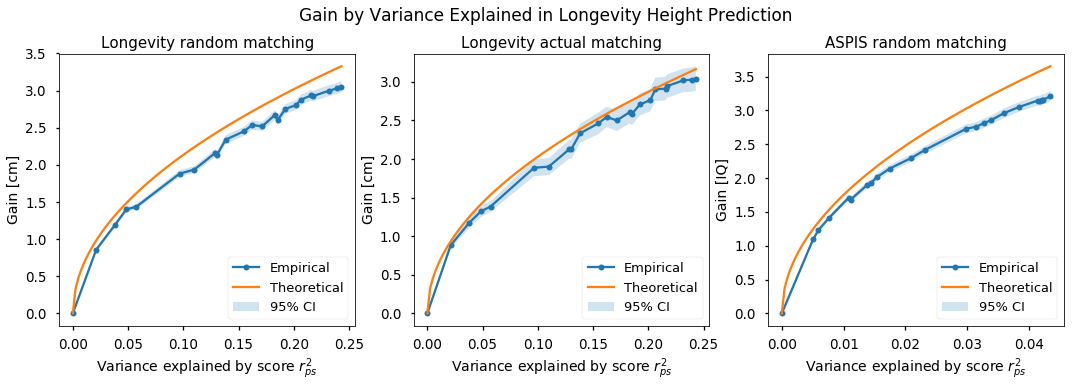

In [36]:
APPROX_MAX = False
MAX_R2_DOMAIN = True
SHAREY = False
INT_TICK = False
pc = "no"
fig, axes = plot_figure(empirical_data, pgs_models, parents_correlation[pc], 
                        APPROX_MAX, MAX_R2_DOMAIN, PLOT_THICKENS, SHAREY, INT_TICK)

In [252]:
file_name = ("gain-by-r2" + 
            ("_range40" if not MAX_R2_DOMAIN else "") + 
            ("_approx" if APPROX_MAX else "") + 
            ("_sharey" if SHAREY else "") + 
            ("_pc-{}".format(pc)) + 
            ("_thick" if PLOT_THICKENS else ""))
print(file_name)
plot.save_fig(fig, file_name, SAVE_FIG_DIR)

gain-by-r2_pc-data_thick


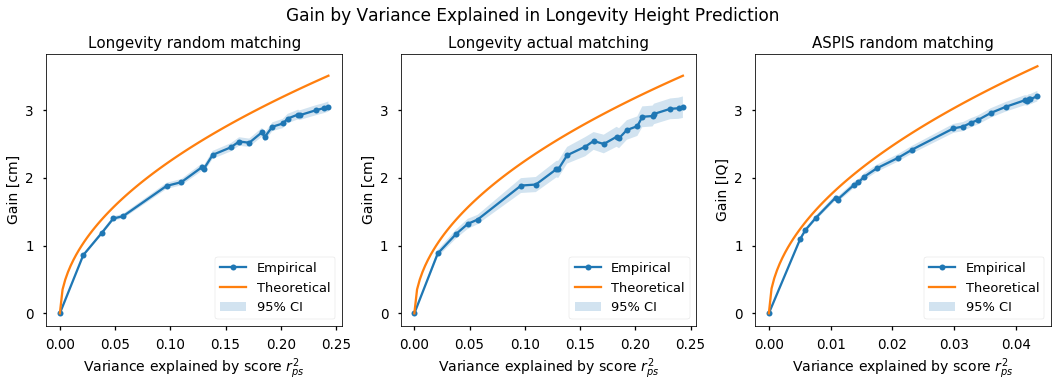

In [38]:
APPROX_MAX = True
MAX_R2_DOMAIN = True
SHAREY = True
INT_TICK = True
pc = "no"
fig, axes = plot_figure(empirical_data, pgs_models, parents_correlation[pc], 
                        APPROX_MAX, MAX_R2_DOMAIN, PLOT_THICKENS, SHAREY, INT_TICK)

In [267]:
file_name = ("gain-by-r2" + 
            ("_range40" if not MAX_R2_DOMAIN else "") + 
            ("_approx" if APPROX_MAX else "") + 
            ("_sharey" if SHAREY else "") + 
            ("_pc-{}".format(pc)) + 
            ("_thick" if PLOT_THICKENS else ""))
print(file_name)
plot.save_fig(fig, file_name, SAVE_FIG_DIR)

gain-by-r2_approx_sharey_pc-no_thick


Change scaling approximation

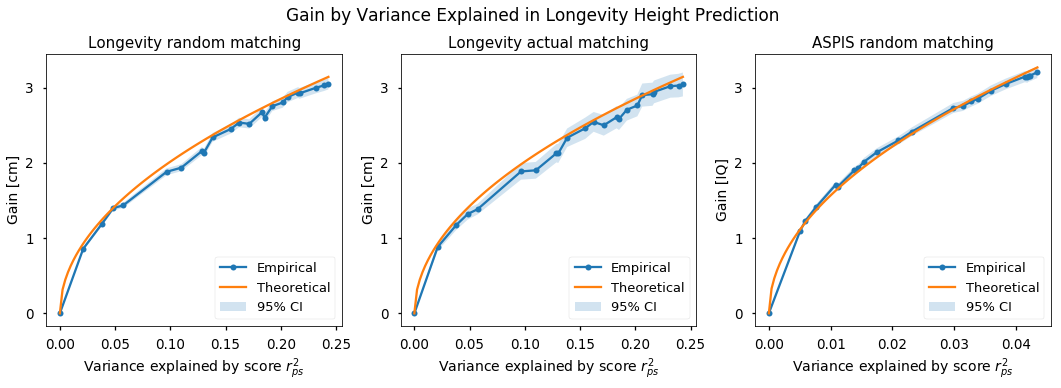

In [39]:
def gauss_max_exp(n, approx=False, approx_scale=0.69):
    if approx:
        phi_max = np.sqrt(np.log(n)) * approx_scale
    else:
        gamma = 0.5772
        phi_max = stats.norm().ppf(1 - 1/n)
        phi_max += gamma / (n * stats.norm().pdf(phi_max))
        phi_max /= np.sqrt(2)
    return phi_max
APPROX_MAX = True
MAX_R2_DOMAIN = True
SHAREY = True
INT_TICK = True
pc = "no"
fig, axes = plot_figure(empirical_data, pgs_models, parents_correlation[pc], 
                        APPROX_MAX, MAX_R2_DOMAIN, PLOT_THICKENS, SHAREY, INT_TICK)

In [40]:
file_name = ("gain-by-r2" + 
            ("_range40" if not MAX_R2_DOMAIN else "") + 
            ("_approx-scaled69" if APPROX_MAX else "") + 
            ("_sharey" if SHAREY else "") + 
            ("_pc-{}".format(pc)) + 
            ("_thick" if PLOT_THICKENS else ""))
print(file_name)
plot.save_fig(fig, file_name, SAVE_FIG_DIR)

gain-by-r2_approx-scaled69_sharey_pc-no_thick


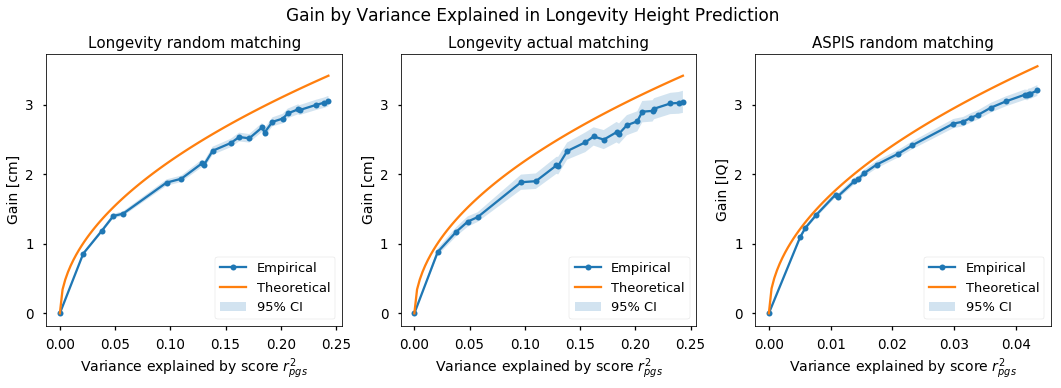

In [71]:
APPROX_MAX = False
MAX_R2_DOMAIN = True
SHAREY = True
INT_TICK = True
pc = "no"
fig, axes = plot_figure(empirical_data, pgs_models, parents_correlation[pc], 
                        APPROX_MAX, MAX_R2_DOMAIN, PLOT_THICKENS, SHAREY, INT_TICK)

In [60]:
import pickle
with open(os.path.join(SAVE_FIG_DIR, "plot_data.pkl"), "rb") as fh:
    empirical_data, pgs_models, parents_correlation = pickle.load(fh)

In [72]:
file_name = ("gain-by-r2" + 
            ("_range40" if not MAX_R2_DOMAIN else "") + 
            ("_approx" if APPROX_MAX else "") + 
            ("_sharey" if SHAREY else "") + 
            ("_pc-{}".format(pc)) + 
            ("_thick" if PLOT_THICKENS else ""))
print(file_name)
plot.save_fig(fig, file_name, SAVE_FIG_DIR)

gain-by-r2_sharey_pc-no_thick


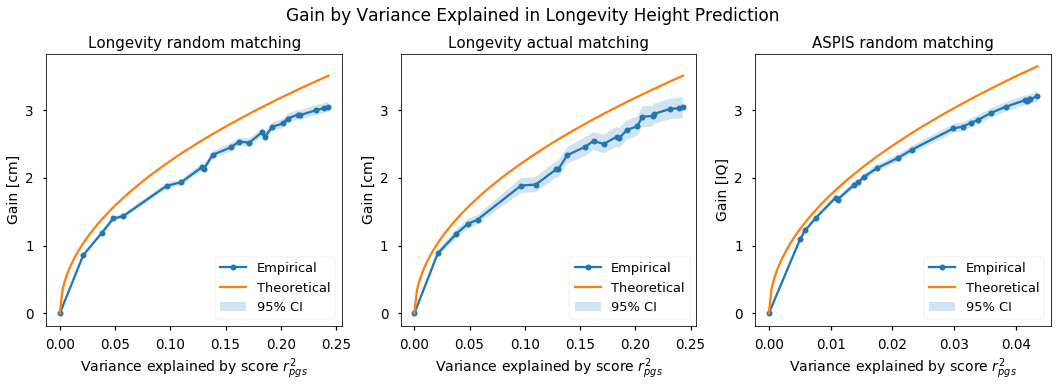

In [73]:
APPROX_MAX = True
MAX_R2_DOMAIN = True
SHAREY = True
INT_TICK = True
pc = "no"
fig, axes = plot_figure(empirical_data, pgs_models, parents_correlation[pc], 
                        APPROX_MAX, MAX_R2_DOMAIN, PLOT_THICKENS, SHAREY, INT_TICK)

In [74]:
file_name = ("gain-by-r2" + 
            ("_range40" if not MAX_R2_DOMAIN else "") + 
            ("_approx" if APPROX_MAX else "") + 
            ("_sharey" if SHAREY else "") + 
            ("_pc-{}".format(pc)) + 
            ("_thick" if PLOT_THICKENS else ""))
print(file_name)
plot.save_fig(fig, file_name, SAVE_FIG_DIR)

gain-by-r2_approx_sharey_pc-no_thick


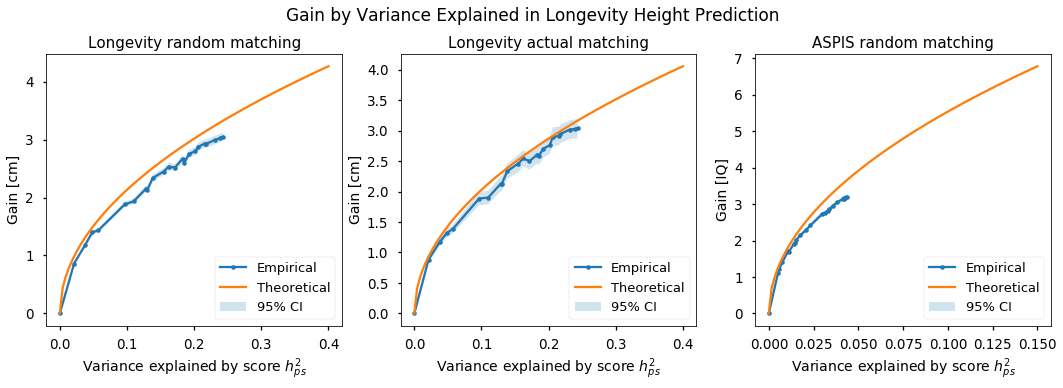

In [217]:
APPROX_MAX = False
MAX_R2_DOMAIN = False
SHAREY = False
INT_TICK = True
pc = "no"
fig, axes = plot_figure(empirical_data, pgs_models, parents_correlation[pc], 
                        APPROX_MAX, MAX_R2_DOMAIN, PLOT_THICKENS, SHAREY, INT_TICK)

In [44]:
file_name = ("gain-by-r2" + 
            ("_range40" if not MAX_R2_DOMAIN else "") + 
            ("_approx" if APPROX_MAX else "") + 
            ("_sharey" if SHAREY else "") + 
            ("_pc-{}".format(pc)) + 
            ("_thick" if PLOT_THICKENS else ""))
print(file_name)
plot.save_fig(fig, file_name, SAVE_FIG_DIR)

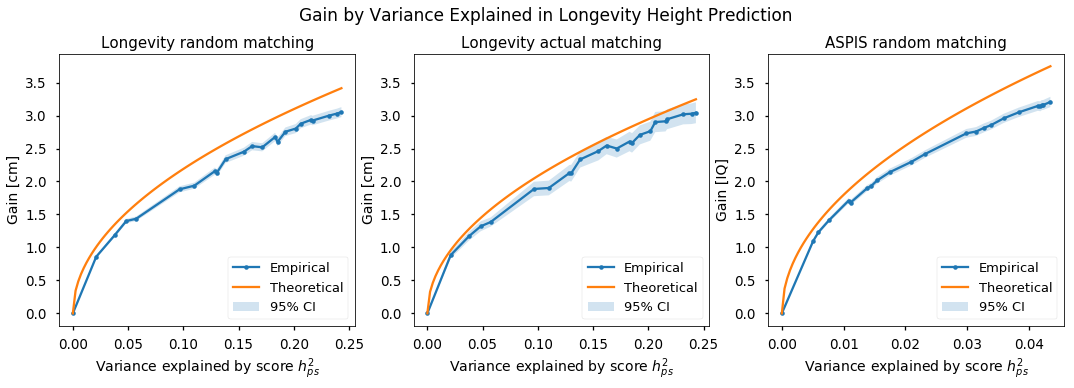

In [218]:
APPROX_MAX = True
MAX_R2_DOMAIN = True
SHAREY = True
INT_TICK = True
pc = "data"
fig, axes = plot_figure(empirical_data, pgs_models, parents_correlation[pc], 
                        APPROX_MAX, MAX_R2_DOMAIN, PLOT_THICKENS, SHAREY, INT_TICK)

In [219]:
file_name = ("gain-by-r2" + 
            ("_range40" if not MAX_R2_DOMAIN else "") + 
            ("_approx" if APPROX_MAX else "") + 
            ("_sharey" if SHAREY else "") + 
            ("_pc-{}".format(pc)) + 
            ("_thick" if PLOT_THICKENS else ""))
print(file_name)
plot.save_fig(fig, file_name, SAVE_FIG_DIR)

gain-by-r2_approx_sharey_pc-data_thick
